In [5]:
import numpy as np
from sldata import SessionData
import matplotlib.pyplot as plt
import sys

### Populate SessionData

In [7]:
mouse_id = "7004"
session_id = "m4"
experiment = "clickbait-motivate"

print("=== Testing SessionData Class ===")
print(f"Loading data for {mouse_id}_{session_id}...")

data = SessionData(
    mouse_id=mouse_id,
    session_id=session_id,
    experiment=experiment,
    min_spikes=50,
    verbose=True)

=== Testing SessionData Class ===
Loading data for 7004_m4...
Successfully loaded spike_times from S:\clickbait-motivate\kilosorted\7004\m4\spike_times.npy
Successfully loaded spike_templates from S:\clickbait-motivate\kilosorted\7004\m4\spike_templates.npy
Successfully loaded templates from S:\clickbait-motivate\kilosorted\7004\m4\templates.npy
Successfully loaded sniff from S:\clickbait-motivate\preprocessed\7004\m4\sniff.npy
Loaded data: ['spike_times', 'spike_templates', 'templates', 'sniff']
Successfully loaded events from S:\clickbait-motivate\bonsai\7004\m4\events.csv
Filtering and decimating sniff signal from 30kHz to 1kHz...
Found 20125 peaks in sniff signal
Peak times range: 16.0 - 2649261.0 ms
Loaded 33 clusters for 7004_m4
Loaded sniff data: 2649560 samples
Found 20125 sniff events


### Sniff Signal

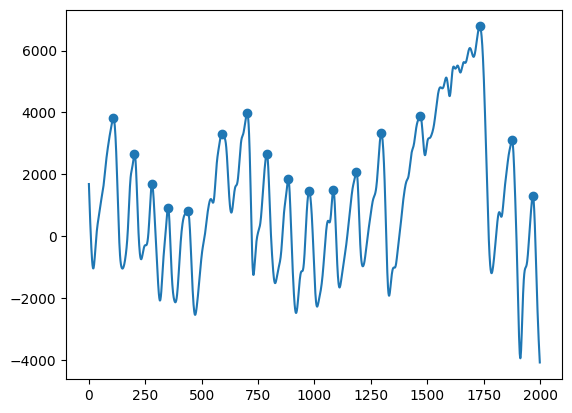

In [8]:
start = 5000
end = 7000
sniffs = np.array([round(x) for x in data.sniff_times if start < x < end])

plt.plot(data.sniff[start:end])
plt.scatter(sniffs-start, data.sniff[sniffs])

Created population matrix: 33 neurons x 100 time bins
Time range: 500000.0 - 505000.0 ms
Bin size: 50 ms


Text(0.5, 0, '50ms bins')

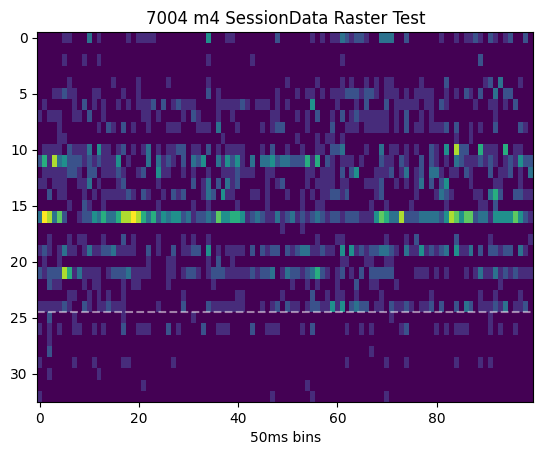

In [9]:
### Population Raster
start_time=1000*500
end_time=start_time+5000 
bin_size_ms=50

pop_matrix, time_bins, included_clusters = data.create_population_raster(
    start_time=start_time,
    end_time=end_time, 
    bin_size_ms=bin_size_ms,
    zscore_neurons=False,
    cluster_ids=None
)

# Check when regions switch
for ii in range(len(data.clusters)):
    if data.clusters[ii]['best_channel'] > 16:
        region_line = ii
        break

plt.imshow(pop_matrix, aspect='auto')
plt.axhline(region_line-.5, c='w', linestyle='dashed', alpha=.5)
plt.title(f"{mouse_id} {session_id} SessionData Raster Test")
plt.xlabel(f"{bin_size_ms}ms bins")

In [10]:
data.clusters[12]['n_spikes']

33561

Created sniff-locked raster for cluster 11: (20125, 1001) (sniffs x timesteps)


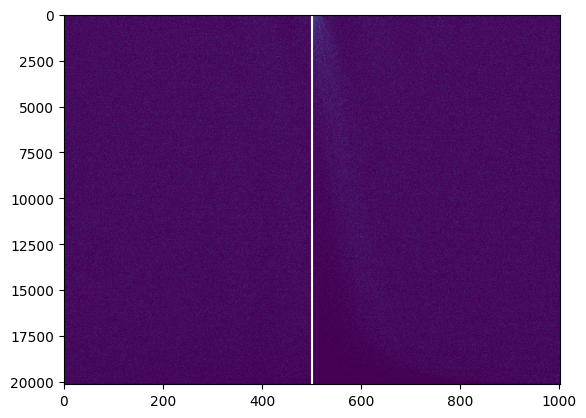

In [11]:
sniff_locked = data.create_sniff_locked_raster(cluster_idx=11, window_ms=500)
plt.imshow(sniff_locked, aspect='auto')
plt.axvline(500, color='w')

Created scatter data: 593605 spikes across 1 clusters and 20125 sniff events


\\wsl.localhost\Ubuntu-20.04\home\nghess\git-repos\sl-data\src\sldata\SessionData.py:1396: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0)


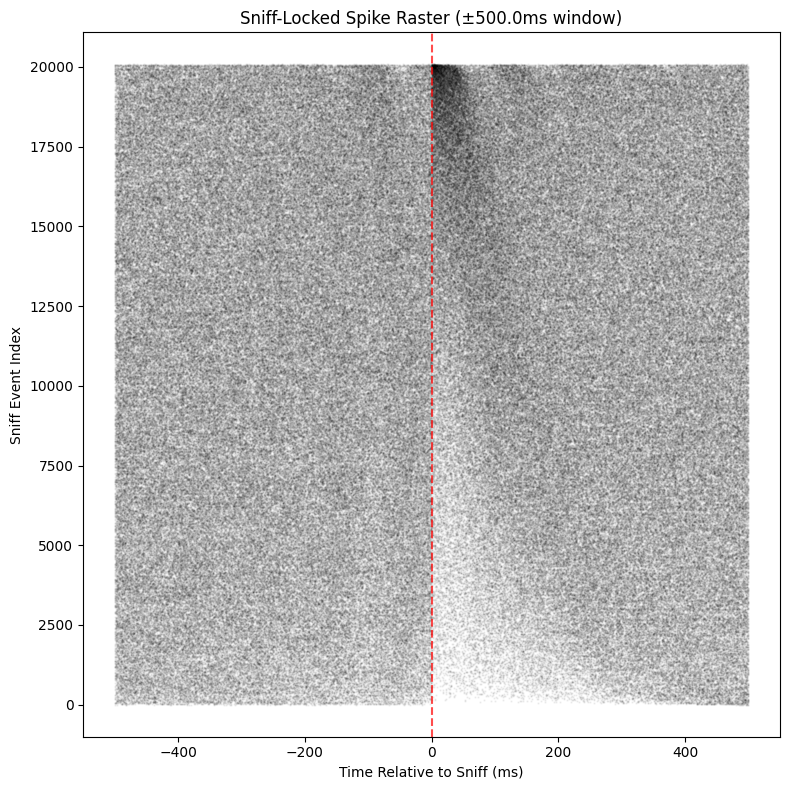

(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Sniff-Locked Spike Raster (±500.0ms window)'}, xlabel='Time Relative to Sniff (ms)', ylabel='Sniff Event Index'>)

In [27]:
data.plot_sniff_locked_scatter(cluster_indices=[11])

### Cluster Attribute

In [12]:
data.clusters[5]

{'cluster_id': 5,
 'best_channel': 6,
 'spike_times': array([1.95666667e+01, 1.26766667e+02, 1.70233333e+02, ...,
        2.64929427e+06, 2.64931970e+06, 2.64933090e+06]),
 'waveform_template': array([ 0.4383543 ,  0.4445825 ,  0.44882894,  0.44961494,  0.4412111 ,
         0.44728166,  0.4696365 ,  0.49341372,  0.5001443 ,  0.49659026,
         0.5399359 ,  0.69996953,  0.96294385,  1.1987062 ,  1.1762552 ,
         0.70217234, -0.284954  , -1.6463912 , -3.1893342 , -4.3757124 ,
        -4.759004  , -4.157141  , -3.0674827 , -1.9822329 , -1.2340451 ,
        -0.77826756, -0.41755283, -0.07092151,  0.25252232,  0.4996062 ,
         0.65444887,  0.74901074,  0.81694055,  0.8766647 ,  0.9208281 ,
         0.94298434,  0.9505133 ,  0.9290169 ,  0.8976539 ,  0.85033983,
         0.7890427 ,  0.7264416 ,  0.6715046 ,  0.6244452 ,  0.5700968 ,
         0.50379646,  0.43904006,  0.36745432,  0.31568506,  0.27296433,
         0.23295373,  0.19333205,  0.15702355,  0.13056673,  0.10820224,
    

### Cluster Filtering

In [14]:
hc_data = data.filter_clusters('best_channel <= 16')
ob_data = data.filter_clusters('best_channel > 16')

Filtered spikes with condition 'flip_state == False': 457946/874871 spikes retained
Filtered spikes with condition 'flip_state == True': 409563/874871 spikes retained


33

### Bonsai Events

In [30]:
import pandas as pd

sum(pd.isna(data.events['target_cell']))

24402

In [31]:
test = pd.DataFrame()
test['reward_state'] = (pd.isna(data.events['target_cell']) & 
                                (data.events['iti'] == False))

len(test[test['reward_state'] == True])

19962

In [32]:
print(len(data.events[data.events['reward_state'] == False]))
print(len(data.events[data.events['drinking'] == True]))

64610
5663


### Event Filtering

In [15]:
flip_state_0 = data.filter_events('flip_state == False')
flip_state_1 = data.filter_events('flip_state == True')

Filtered spikes with condition 'flip_state == False': 457946/874871 spikes retained
Filtered spikes with condition 'flip_state == True': 409563/874871 spikes retained


In [16]:
# Do we want to retain original events df or filter it?
print(len(flip_state_0.events))
print(len(flip_state_1.events))

78909
78909


In [17]:
flip_1_df = data.events[data.events['flip_state'] == True] 
flip_0_df = data.events[data.events['flip_state'] == False] 

In [21]:
print(len(flip_1_df))
print(len(flip_0_df))
print(np.median(flip_0_df['centroid_y']))
print(np.median(flip_1_df['centroid_y']))


36860
42049
927.0
1092.5


In [34]:
hc_data.events

,trial_number,timestamp,poke_left,poke_right,centroid_x,centroid_y,target_cell,iti,water_left,water_right,reward_state,click,flip_state,speed,direction,drinking,timestamp_ms
0,0,2025-06-25 15:14:23.264371200,False,False,672,303,16.0,False,True,False,False,False,False,0.000000,0.000000,False,8259
1,0,2025-06-25 15:14:23.298073600,False,False,679,291,16.0,False,True,False,False,False,False,13.892444,1.570689,False,8292
2,0,2025-06-25 15:14:23.327820800,False,False,682,279,16.0,False,True,False,False,False,False,12.369317,1.570751,False,8325
3,0,2025-06-25 15:14:23.348633600,False,False,675,275,16.0,False,True,False,False,False,False,8.062258,0.785421,False,8359
4,0,2025-06-25 15:14:23.370880000,False,False,672,275,16.0,False,True,False,False,False,False,3.000000,0.000000,False,8392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78904,38,2025-06-25 15:58:13.646528000,False,False,484,1657,40.0,False,False,False,False,False,True,0.000000,0.000000,False,2638384
78905,38,2025-06-25 15:58:13.681881600,False,False,484,1658,40.0,False,False,False,False,False,True,1.000000,1.570796,False,2638417
78906,38,2025-06-25 15:58:13.720460800,False,False,483,1658,40.0,False,False,False,False,False,True,1.000000,0.000000,False,2638451
78907,38,2025-06-25 15:58:13.748121600,False,False,483,1658,40.0,False,False,False,False,False,True,0.000000,0.000000,False,2638484


In [41]:
flip_t, flip_f = data.filter_events('flip_state == True', return_false_condition=True)

Filtered spikes with condition 'flip_state == True': 409563/874871 spikes retained
False condition spikes: 457946/874871 spikes


### Alignment Inspection

In [36]:
# from scipy.signal import decimate

# reward_path = f"S:/{experiment}/preprocessed/{mouse_id}/{session_id}/reward.npy"
# reward_raw = np.load(reward_path)
# reward_1khz = decimate(reward_raw, 30, ftype='iir', zero_phase=True)

In [37]:
# # Covert voltages to bool
# start = data.events['timestamp_ms'][0]
# reward_bool = np.zeros_like(reward_1khz)
# reward_idx = np.where(reward_1khz > 0)
# reward_bool[reward_idx] = 1
# reward_bool[:start+25000] = 0  # Clean up initial reward noise (find a clean solution for this)
# reward_transition = np.where(np.diff(reward_bool) == 1)[0]
# reward_transition[0] # First reward state transition

In [38]:
# # Preview reward state boolean
# plt.plot(reward_bool[:1000*250])
# plt.axvline(data.events['timestamp_ms'][0], color='r', linestyle='--')
# plt.axvline(reward_transition[0], color='g', linestyle='--')
# plt.title('Start of Video and First Reward')
# plt.show()

In [39]:
# # Pick a transition to check
# reward_state_transition = reward_transition[-1]
# print(reward_state_transition)

In [40]:
# # Check for reward state transition in events dataframe
# data.events[data.events['timestamp_ms'].between(reward_state_transition-120, reward_state_transition+120)]